In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extracting core pill temperature values from xlsx to individual csv files

In [2]:
excel_file = '../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/All Participants Core Data.xlsx'
all_sheets = pd.read_excel(excel_file, sheet_name=None)
sheets = all_sheets.keys()

for sheet_name in sheets:
    sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
    sheet.to_csv("%s.csv" % sheet_name, index=False)

# Reading Individual participants data to preprocessing

In [3]:
import os

# all the csv files in the folder end with .csv
location = "../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/corepill"

csv_files = [csv_file for csv_file in os.listdir(location) if csv_file.endswith(".csv")]

In [4]:
csv_files

['sheet1.csv',
 'Sheet10.csv',
 'Sheet11.csv',
 'Sheet12.csv',
 'Sheet13.csv',
 'Sheet14.csv',
 'Sheet15.csv',
 'Sheet16.csv',
 'Sheet17.csv',
 'Sheet18.csv',
 'sheet2.csv',
 'Sheet3.csv',
 'Sheet4.csv',
 'Sheet5.csv',
 'Sheet6.csv',
 'Sheet7.csv',
 'Sheet8.csv',
 'Sheet9.csv']

In [19]:
df_list = []

for csv_file in csv_files:
    df = pd.read_csv(location + "/" + csv_file, skiprows=5)
    df_list.append(df)

In [20]:
df_list[0]

,Sample number,Date(dd/mm/yyyy),Hour,Temperature (°C),Status
0,1,2022-10-24 00:00:00,10:00:46,24.88,NaN
1,2,2022-10-24 00:00:00,10:01:16,24.88,NaN
2,3,2022-10-24 00:00:00,10:01:47,24.84,NaN
3,4,2022-10-24 00:00:00,10:02:17,24.88,NaN
4,5,2022-10-24 00:00:00,10:02:47,NaN,Missing data
...,...,...,...,...,...
274,275,2022-10-24 00:00:00,12:17:42,NaN,Missing data
275,276,2022-10-24 00:00:00,12:18:12,36.96,NaN
276,277,2022-10-24 00:00:00,12:18:42,36.91,NaN
277,278,2022-10-24 00:00:00,12:19:12,NaN,Missing data


## Checking for missing values for each participant

In [26]:
for df in df_list:
    print(f"missing values = {df.iloc[:, 3].isna().sum()} total = { len(df)}")

missing values = 212 total = 279
missing values = 0 total = 543
missing values = 1 total = 309
missing values = 15 total = 506
missing values = 4 total = 624
missing values = 2 total = 344
missing values = 0 total = 349
missing values = 5 total = 286
missing values = 1 total = 444
missing values = 121 total = 358
missing values = 180 total = 295
missing values = 255 total = 310
missing values = 98 total = 376
missing values = 146 total = 514
missing values = 196 total = 319
missing values = 294 total = 314
missing values = 167 total = 382
missing values = 2 total = 315


## Replacing missing values using linear interpolation

In [28]:
# set 2rd as time "12:31:16 PM" and index for each dataframe

for df in df_list:
    df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2])
    df.set_index(df.iloc[:, 2], inplace=True)

C:\Users\manup\AppData\Local\Temp\ipykernel_61524\237671910.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2])
C:\Users\manup\AppData\Local\Temp\ipykernel_61524\237671910.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2])
C:\Users\manup\AppData\Local\Temp\ipykernel_61524\237671910.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old b

In [29]:
df_list[0]

,Sample number,Date(dd/mm/yyyy),Hour,Temperature (°C),Status
Hour,,,,,
2023-05-17 10:00:46,1,2022-10-24 00:00:00,2023-05-17 10:00:46,24.88,NaN
2023-05-17 10:01:16,2,2022-10-24 00:00:00,2023-05-17 10:01:16,24.88,NaN
2023-05-17 10:01:47,3,2022-10-24 00:00:00,2023-05-17 10:01:47,24.84,NaN
2023-05-17 10:02:17,4,2022-10-24 00:00:00,2023-05-17 10:02:17,24.88,NaN
2023-05-17 10:02:47,5,2022-10-24 00:00:00,2023-05-17 10:02:47,NaN,Missing data
...,...,...,...,...,...
2023-05-17 12:17:42,275,2022-10-24 00:00:00,2023-05-17 12:17:42,NaN,Missing data
2023-05-17 12:18:12,276,2022-10-24 00:00:00,2023-05-17 12:18:12,36.96,NaN
2023-05-17 12:18:42,277,2022-10-24 00:00:00,2023-05-17 12:18:42,36.91,NaN


In [30]:
for df in df_list:
    df.iloc[:, 3] = df.iloc[:, 3].interpolate(method='linear')
    print(df.iloc[:, 3].isna().sum() , len(df))

0 279
0 543
0 309
0 506
0 624
0 344
0 349
0 286
0 444
0 358
0 295
0 310
0 376
0 514
0 319
0 314
0 382
0 315


In [31]:
df_list[0]

,Sample number,Date(dd/mm/yyyy),Hour,Temperature (°C),Status
Hour,,,,,
2023-05-17 10:00:46,1,2022-10-24 00:00:00,2023-05-17 10:00:46,24.880000,NaN
2023-05-17 10:01:16,2,2022-10-24 00:00:00,2023-05-17 10:01:16,24.880000,NaN
2023-05-17 10:01:47,3,2022-10-24 00:00:00,2023-05-17 10:01:47,24.840000,NaN
2023-05-17 10:02:17,4,2022-10-24 00:00:00,2023-05-17 10:02:17,24.880000,NaN
2023-05-17 10:02:47,5,2022-10-24 00:00:00,2023-05-17 10:02:47,25.437143,Missing data
...,...,...,...,...,...
2023-05-17 12:17:42,275,2022-10-24 00:00:00,2023-05-17 12:17:42,36.926667,Missing data
2023-05-17 12:18:12,276,2022-10-24 00:00:00,2023-05-17 12:18:12,36.960000,NaN
2023-05-17 12:18:42,277,2022-10-24 00:00:00,2023-05-17 12:18:42,36.910000,NaN


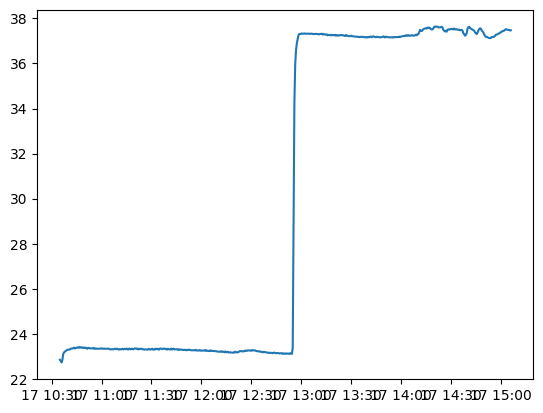

In [37]:
plt.plot(df_list[1].index, df_list[1].iloc[:, 3])
plt.show()

In [40]:
# save all the dataframes to csv files in a folder called "corepill_preprocessed"

os.mkdir("../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/corepill_preprocessed")

for i in range(0, len(df_list)):
    df_list[i].to_csv("../HYP_T_Data_Files/OneDrive_2023-01-15 (1)/All participants/corepill_preprocessed/" + csv_files[i])